In [3]:
# load necessary packages
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy.random import randn
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure

In [68]:
# generate random transactions from 3 waves of patrons 
seed(1)

transactions_wave_1 = np.array(20 + randn(1000))
transactions_wave_2 = np.array(23 + randn(3000))
transactions_wave_3 = np.array(24 + randn(1000))

In [69]:
# combine waves
transactions = np.concatenate([wave_1, wave_2, wave_3])

In [71]:
# convert transaction times to a 24-hour clock
clock_mapper = lambda t: t if t < 24 else t - 24
hours = np.vectorize(clock_mapper)
transaction_hours = hours(transactions)

In [78]:
# filter on hours after 6pm and before 1:30am 
transaction_hours = transaction_hours[(transaction_hours >= 18) | (transaction_hours <= 1.5)]

In [83]:
# convert to radians on a 24 hour clock  
hours_transformed = (2 * np.pi) * (transaction_hours / 24) 

In [84]:
# obtain cos and sin values of transformed hours 
cos_hours_transformed = np.cos(hours_transformed)
sin_hours_transformed = np.sin(hours_transformed)

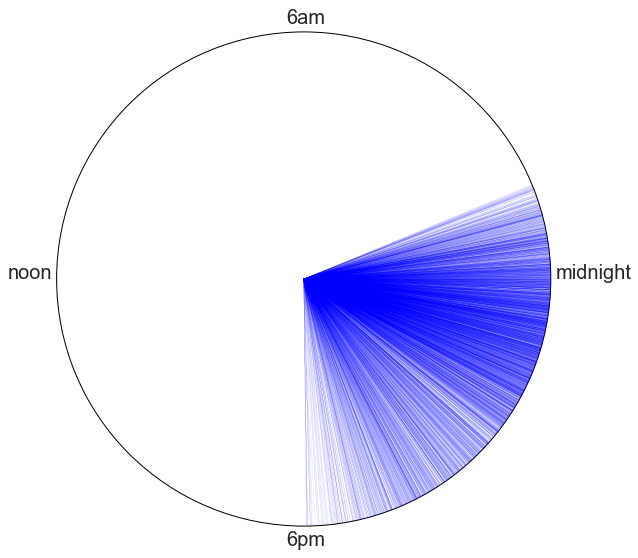

In [88]:
## draw clock of transactions

#figure
plt.figure(figsize=(10,10))

#draw circle
circle = plt.Circle((0, 0), 1, color='black', fill=False, clip_on=False)

ax = plt.gca()
ax.add_patch(circle)
plt.axis('scaled')

#add times 
def draw_clock(a, b):
    plt.plot([0, a], [0, b], color='blue', linewidth=.05)

x = cos_hours_transformed
y = sin_hours_transformed

for i in range(len(hours_transformed)):
    draw_clock(x[i], y[i])
    
#add hours on face
ax.text(1.02, 0, r'midnight', fontsize=20)
ax.text(-0.07, 1.03, r'6am', fontsize=20)
ax.text(-1.20, 0, r'noon', fontsize=20)
ax.text(-0.07, -1.08, r'6pm', fontsize=20)

#final clock
plt.axis('off')
plt.show()


In [106]:
# calculate avg cos, sin
avg_cos_hour_transformed = sum(cos_hours_transformed) / len(cos_hours_transformed)
avg_sin_hour_transformed = sum(sin_hours_transformed) / len(sin_hours_transformed)

print(avg_cos_hour_transformed, avg_sin_hour_transformed)

0.8557576173724948 -0.3262714228633828


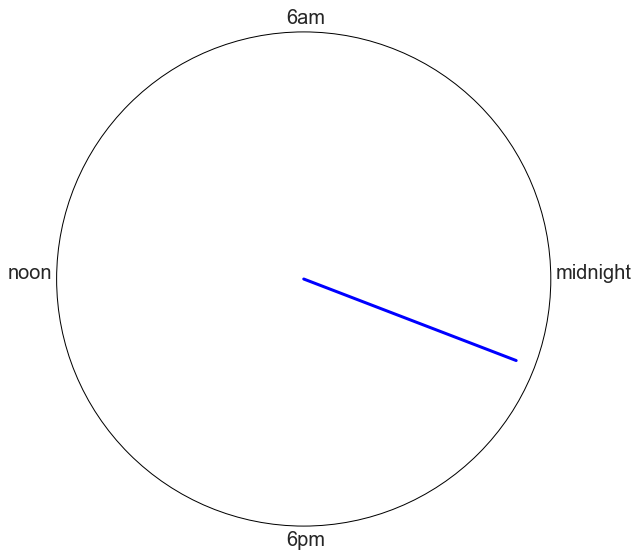

In [117]:
## draw clock of avg time

#figure
plt.figure(figsize=(10,10))

#draw circle
circle = plt.Circle((0, 0), 1, color='black', fill=False, clip_on=False)

ax = plt.gca()
ax.add_patch(circle)
plt.axis('scaled')

#add avg time 
plt.plot([0, 0.86], [0, -0.33], color='blue', linewidth=3)
    
#add hours on face
ax.text(1.02, 0, r'midnight', fontsize=20)
ax.text(-0.07, 1.03, r'6am', fontsize=20)
ax.text(-1.20, 0, r'noon', fontsize=20)
ax.text(-0.07, -1.08, r'6pm', fontsize=20)

#final clock
plt.axis('off')
plt.show()

In [107]:
# find radian of avg 
avg_radian = np.arctan2(avg_sin_hour_transformed, avg_cos_hour_transformed)

print(avg_radian)

-0.3642529431342876


In [108]:
# normalize avg radian 
radian_normalizer = lambda x: x if x > 0 else 2 * np.pi + x
avg_radian_normalized = radian_normalizer(avg_radian)

print(avg_radian_normalized)

5.918932364045299


In [128]:
# hour of normalized avg radian
avg_hour = 24 * (avg_radian_normalized / (2*np.pi))

print(avg_hour)

22.60865624554577


In [129]:
# calculate modulus 
vector_length_squared = avg_cos_hour_transformed**2 + avg_sin_hour_transformed**2
vector_length = np.sqrt(vector_length_squared)

print(vector_length)

0.9158461339484627
